# **Distance Predictor Part 1**
Author: Declan Costello

Date: 5/03/2025

## **Overview**

I plan to predict how far a batted ball is hit based on the 2024 MLB Season. I hope to provide value to the baseball community by combining. Here I talk inspect and explore the data from the 2024 season of BBIP

## **Table of Context**

1. [Variables](#Variables)
2. [Installation](#Installation)
3. [Pulling Data](#Pulling-Data)
4. [Inspecting Data](#Inspecting-Data)
5. [Exploring Data](#Exploring-Data)
6. [Future Data Exploration](#Future-Data-Exploration)


## **Variables**
Descriptions taken Pybaseball and statcast. The following is a list of the important variable to understand for this notebook.

*   **Launch Angle** - In baseball, launch angle is the vertical angle at which the ball leaves the player's bat after being struck. It's measured in relation to the ground. A high launch angle means the ball will go further and higher into the air, and a low launch angle means the ball will go lower and not as far. 

*   **Launch Speed** - Also known as Exit Velocity, The speed, in miles per hour (MPH), at which the ball was launched off the bat after contact.

*   **Release Speed** - The speed, in miles per hour (MPH), at which the pitcher releases the baseball during a pitch.

*   **Hit Distance** - The distance, in feet, from home plate to where the ball was fielded or caught by a fielder.

*   **Altitude** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

*   **WOBA** - Weighted On-Base Average (wOBA) is a comprehensive offensive statistic that quantifies a player's overall offensive performance by assigning different values to various offensive events. It measures a player's ability to produce runs for their team while accounting for the importance of each outcome.

# **Installation**

The following installs the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pybaseball import statcast
import numpy as np

#only turning off for graph
import warnings
warnings.filterwarnings("ignore")

# **Pulling Data**

In [2]:
#data = statcast(start_dt='2024-03-29', end_dt='2024-10-28')
#data.to_csv('pybaseball_2024.csv')
data = pd.read_csv('pybaseball_2024.csv')

# **Exploring Data**

### Understanding Feature Heatmaps

Here is a feature heatmap to gain crucial insights into our dataset. A feature heatmap is a powerful visualization that helps one assess the relationships between different features (variables) in the dataset.

#### Why It Matters:

1. **Feature Correlation:** The heatmap displays the correlation coefficients between pairs of features. High positive correlations (values close to 1) indicate that two features tend to increase or decrease together, while high negative correlations (values close to -1) suggest that one feature increases as the other decreases. Understanding these correlations can guide feature selection and model building.

2. **Feature Selection:** Heatmaps can aid in feature selection by identifying redundant or highly correlated features. Reducing feature redundancy can improve model performance and reduce overfitting.

3. **Insight into Data:** By visualizing feature relationships, we can uncover interesting patterns and insights within the data. This can help us make informed decisions about which features to prioritize or engineer.

4. **Model Interpretability:** A feature heatmap can enhance the interpretability of our machine learning model. It allows us to explain why certain features might have a strong influence on the model's predictions.

In summary, creating a feature heatmap is a valuable step in our model development process. It empowers one to make data-driven decisions, optimize our feature set, and build a more interpretable and effective machine learning model for baseball-related predictions.


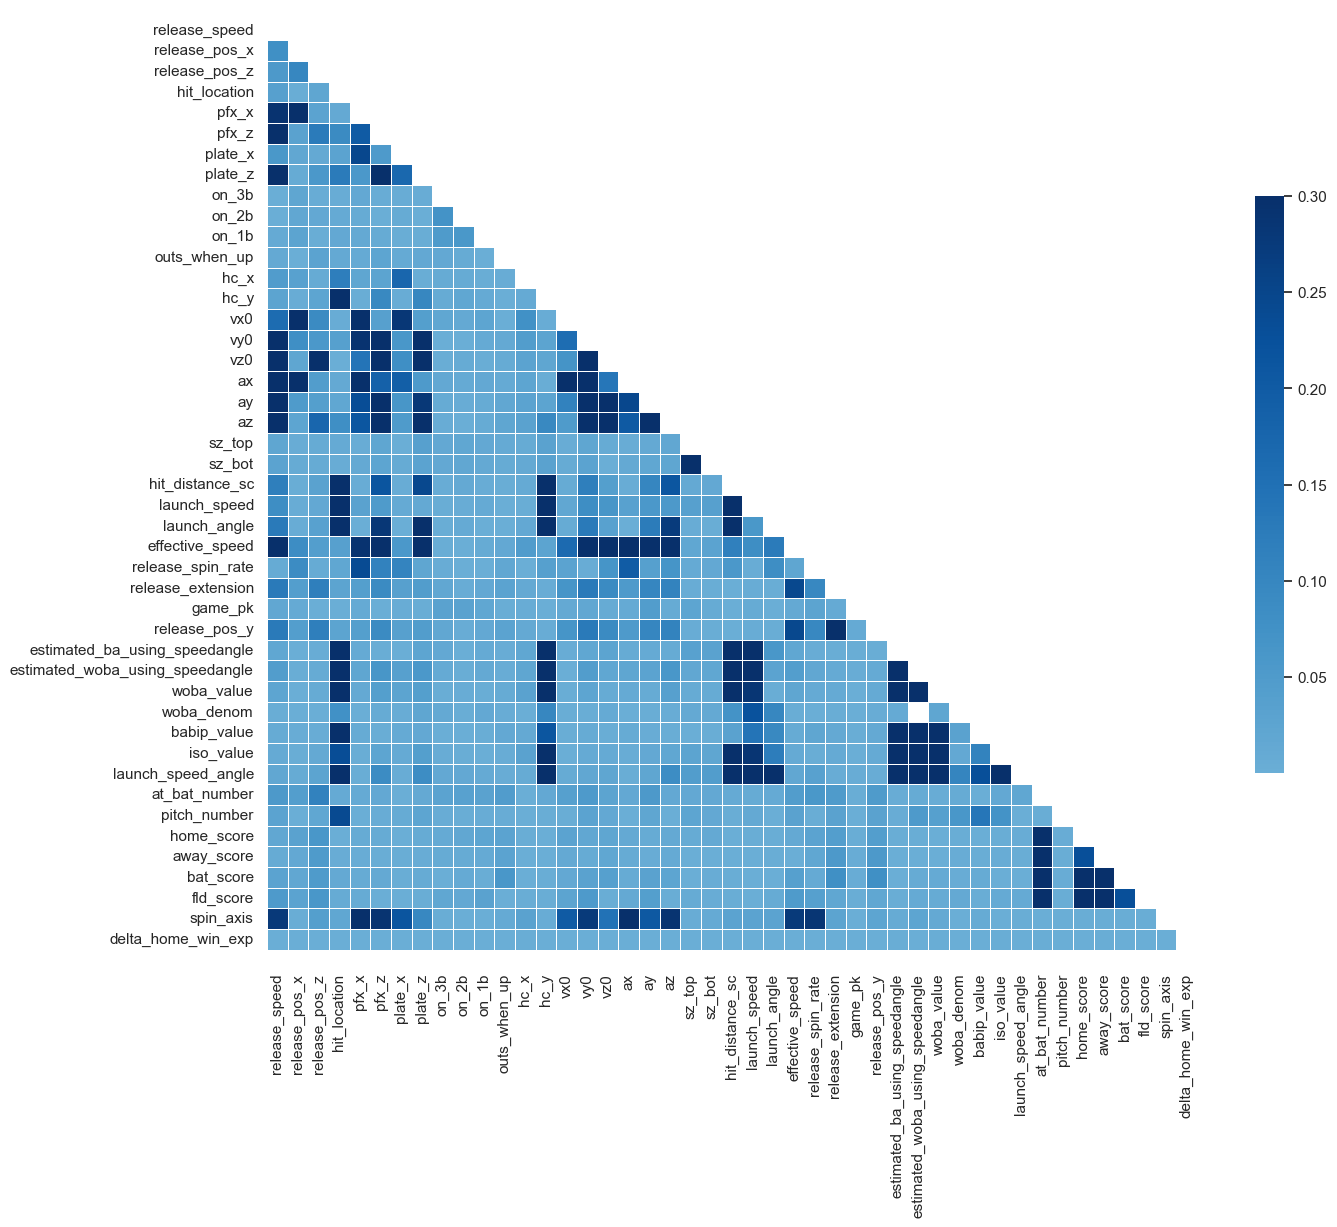

In [3]:
possible_features = data


possible_features = possible_features[[ 'release_speed',
       'release_pos_x', 'release_pos_z', 
       'hit_location', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up',  'hc_x', 'hc_y',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 'pitch_number', 
       'home_score', 'away_score', 'bat_score', 'fld_score', 
        'spin_axis','delta_home_win_exp']]

# Compute the correlation matrix
corr = possible_features.corr()

matrix = np.triu(corr)


plt.figure(figsize=(15, 15))
sns.set_theme(style="white")

sns.heatmap(possible_features.corr().abs(), 
            annot=False, cmap="Blues", 
            mask=matrix,
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

### Analyzing Feature Distributions Plots

Here I utilized `sns.distplot` to visualize the distributions of all our features. This type of visualization provides essential insights into the nature of the data and is a critical step in the data exploration process.

#### Why It Matters:

1. **Data Distribution:** `sns.distplot` allows us to observe the distribution of each feature. We can quickly identify whether a feature follows a normal distribution, is skewed, or exhibits other unique patterns. Understanding data distributions is vital as certain machine learning algorithms make assumptions about data normality.

2. **Outlier Detection:** By examining the histograms, we can spot potential outliers in our data. Outliers can significantly impact model performance, and visualizing them helps us decide whether to remove or handle them appropriately.

3. **Feature Engineering:** Feature distributions can guide feature engineering efforts. For instance, if a feature is not normally distributed, transformations such as log or square root can be applied to make it more suitable for modeling.

4. **Identifying Data Issues:** Unusual or unexpected patterns in feature distributions can indicate data quality issues or errors. It prompts us to investigate and clean the data as needed.

5. **Model Assumptions:** Certain machine learning algorithms assume that input features follow specific distributions. Visualizing feature distributions helps us assess whether our data aligns with these assumptions.

6. **Feature Importance:** Understanding feature distributions can provide insights into feature importance. Features with distinct or skewed distributions may have a more significant impact on the model's predictions.

By creating `sns.distplot` visualizations for all features, one gains a comprehensive understanding of our data's characteristics. This knowledge is invaluable for making informed decisions throughout the model development process, from data preprocessing to selecting appropriate modeling techniques.

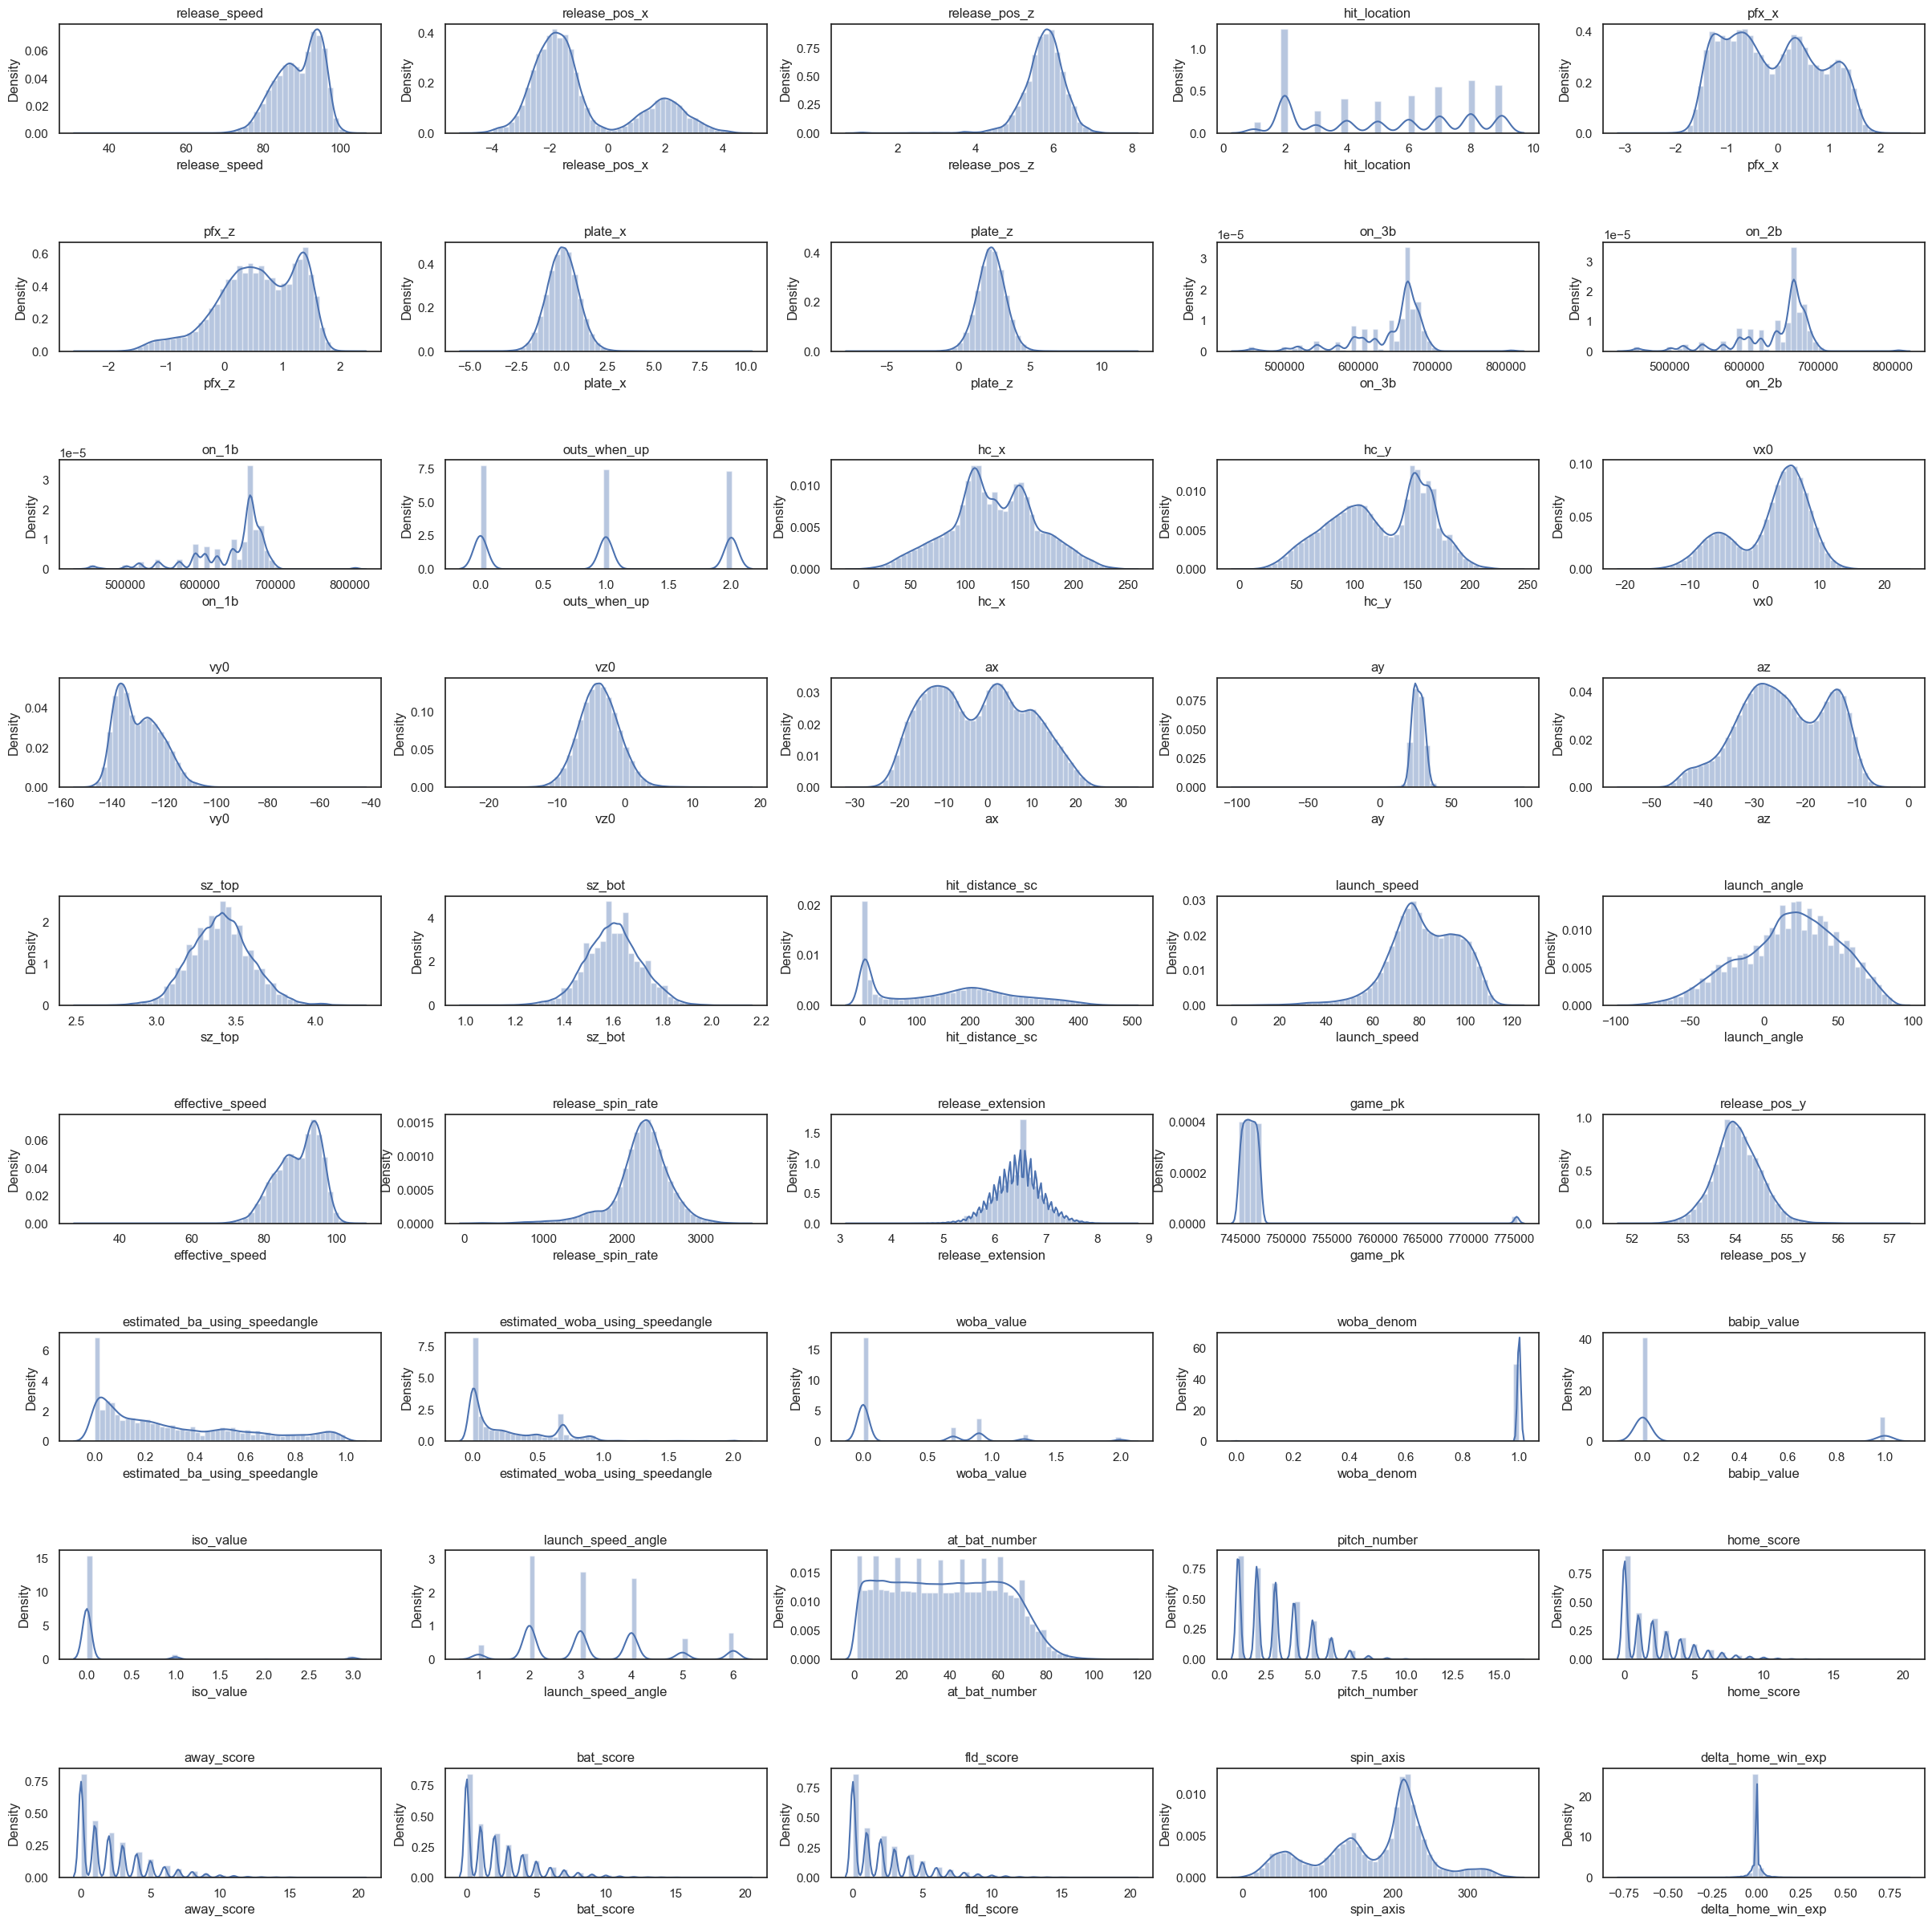

In [4]:
f, ax = plt.subplots(nrows = 9, ncols = 5, figsize=(30,30))
sns.set_theme(style="white")

# Selecting columns we want distributions for 
hist_cols = [ 'release_speed',
       'release_pos_x', 'release_pos_z', 
       'hit_location', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up',  'hc_x', 'hc_y',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 'pitch_number', 
       'home_score', 'away_score', 'bat_score', 'fld_score', 
        'spin_axis','delta_home_win_exp']
row = 0
col = 0

for i, column in enumerate(hist_cols):
    graph = sns.distplot(possible_features[column], ax=ax[row][col])
    graph.set(title = column)
    col += 1
    if col == 5:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

### Exploring Feature Relationships with Scatterplots

Here I harness the power of scatterplots to visualize relationships between all of the features. These scatterplots provide valuable insights into how different variables interact and influence each other within the dataset.

#### Why It Matters:

1. **Identifying Patterns:** Scatterplots allow us to quickly identify patterns and relationships between pairs of features. We can visually assess whether variables are positively correlated, negatively correlated, or exhibit no apparent relationship.

2. **Correlation Strength:** By observing the dispersion of points on the scatterplots, we can gauge the strength of correlations. A tight cluster of points suggests a strong correlation, while a scattered distribution indicates a weak or no correlation.

3. **Data Exploration:** Scatterplots are a fundamental tool in data exploration. They help us understand the underlying structure of our data and guide subsequent data preprocessing and modeling decisions.

4. **Target Relationship:** We can create scatterplots to visualize the relationship between features and the target variable. This aids in identifying which features may be strong predictors of the target.

By generating scatterplots for all the features, one gains a comprehensive understanding of how these variables interact within the dataset. This knowledge is essential for making informed decisions at every stage of the machine learning process, from data preprocessing to model training and evaluation.

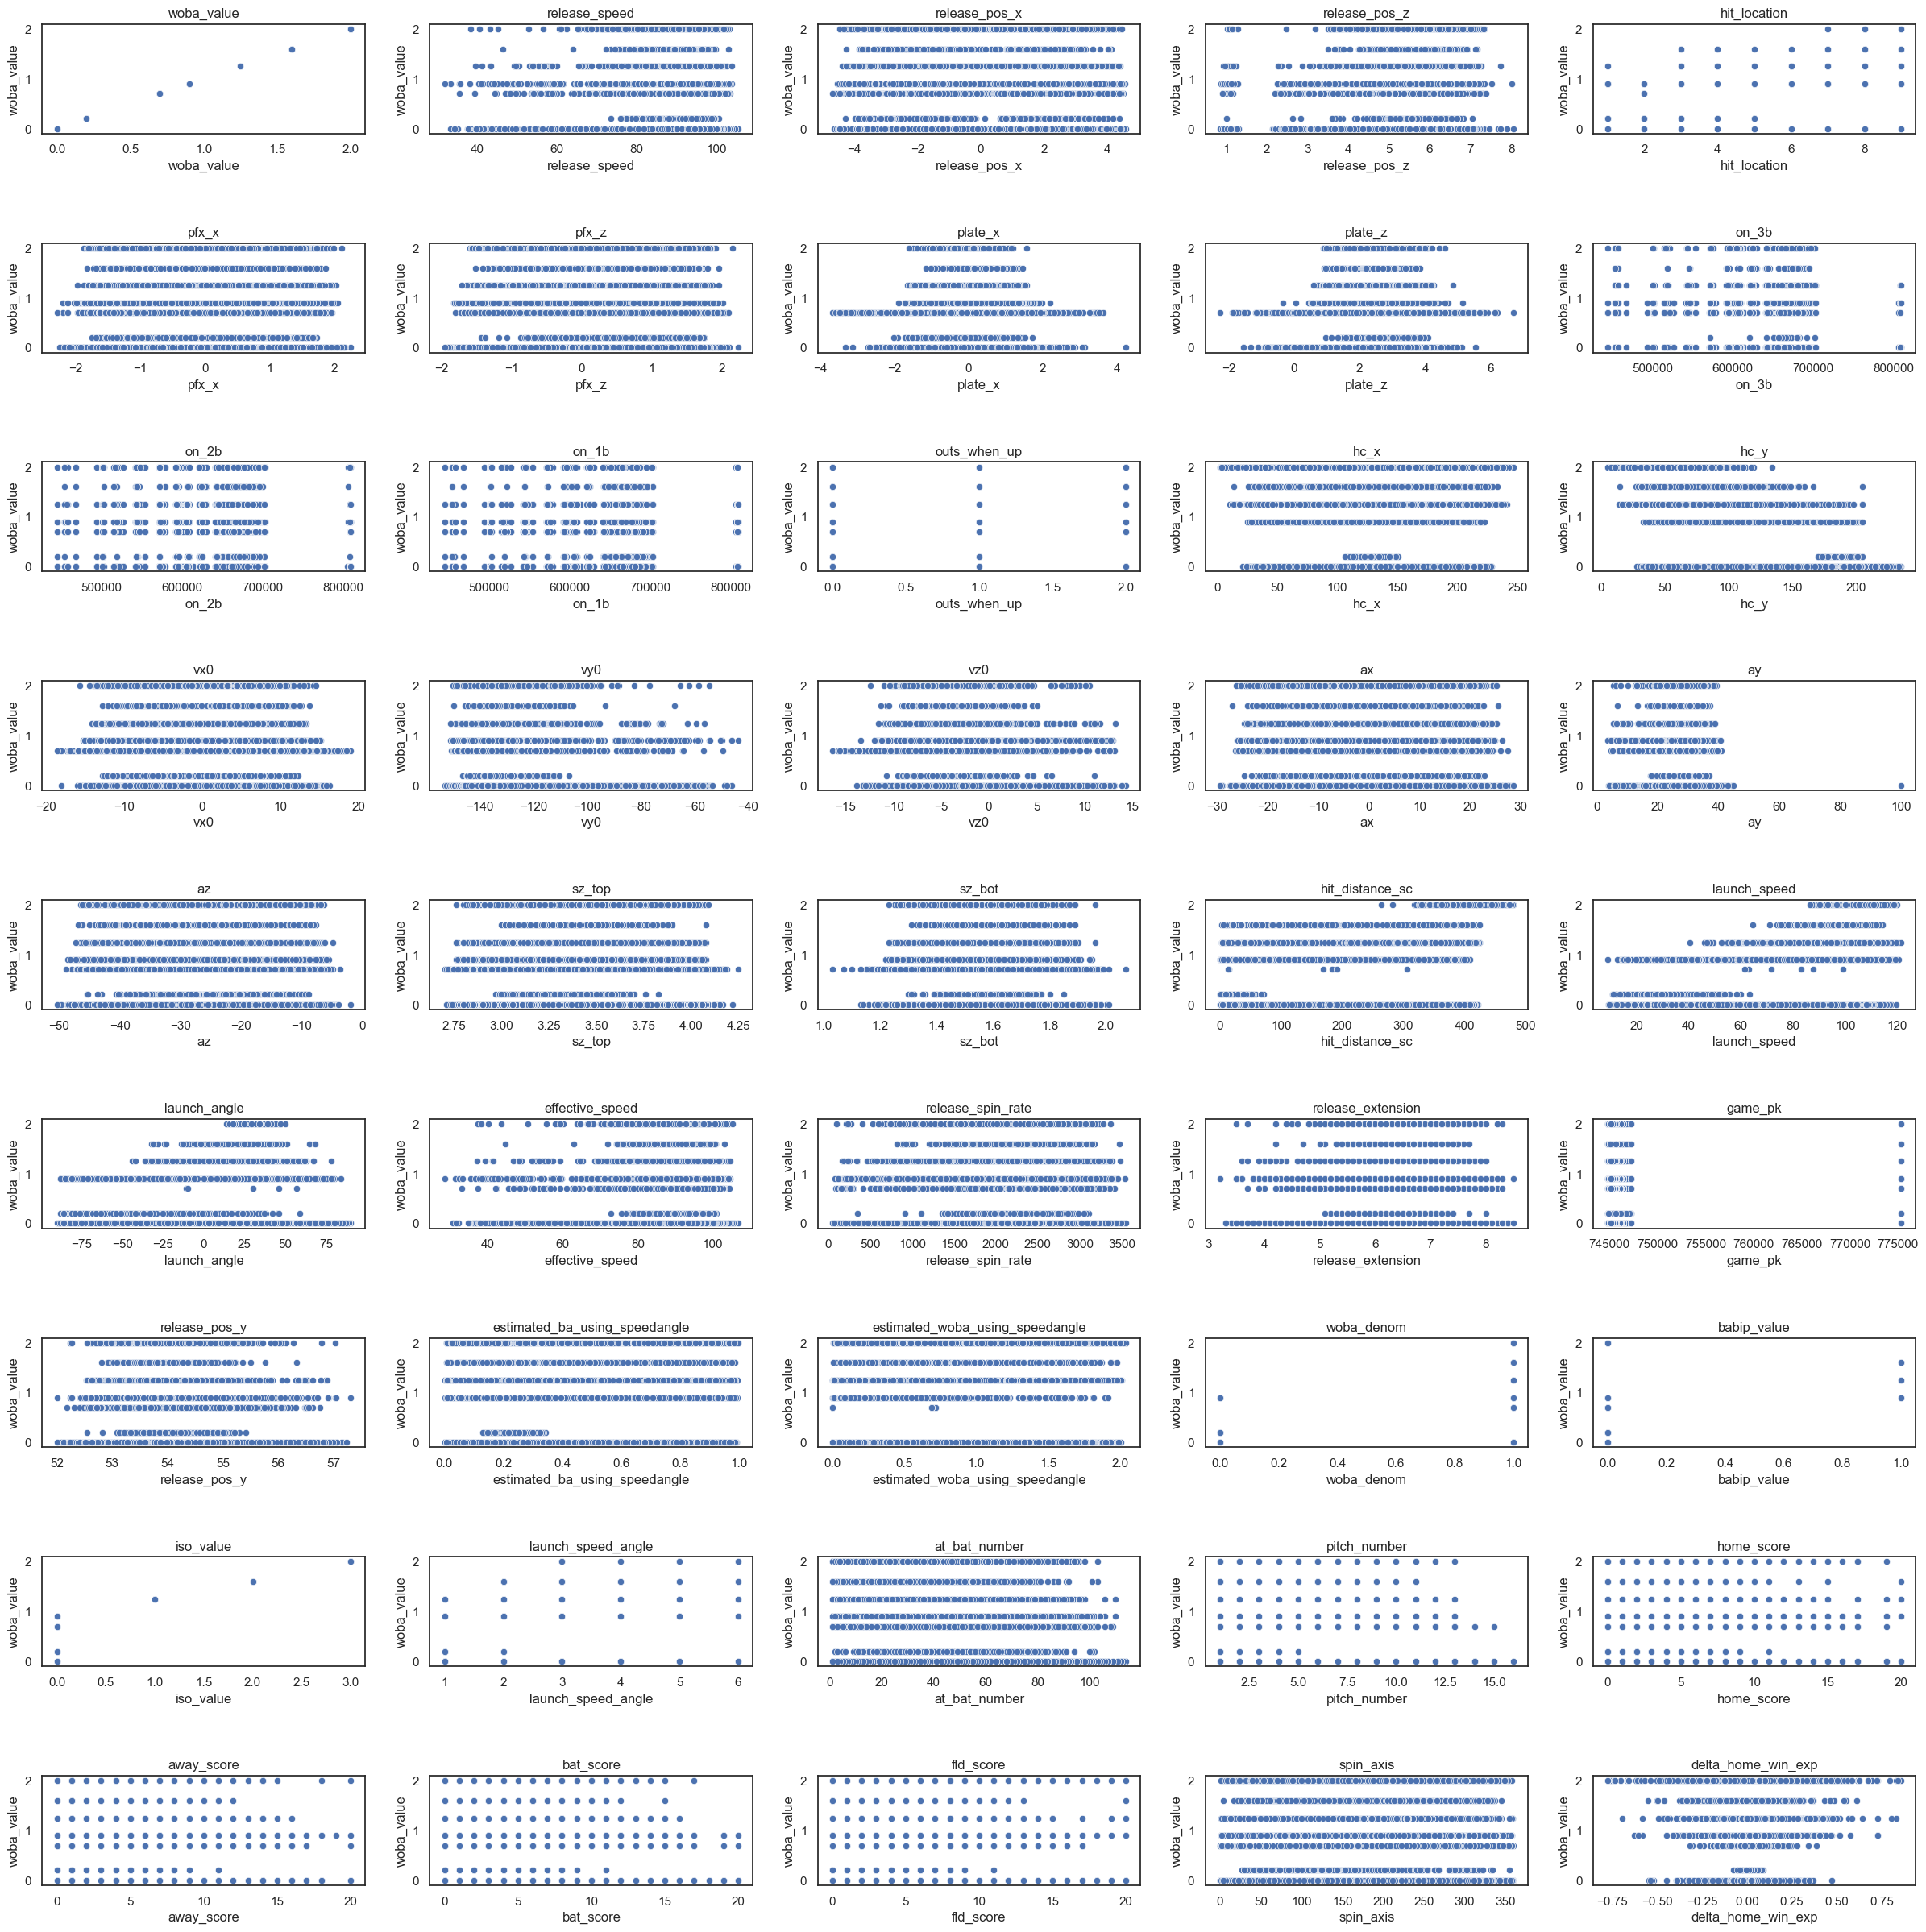

In [5]:
f, ax = plt.subplots(nrows = 9, ncols = 5, figsize=(30,30))
sns.set_theme(style="white")

dist_cols = [ 'woba_value','release_speed',
       'release_pos_x', 'release_pos_z', 
       'hit_location', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up',  'hc_x', 'hc_y',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
        'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 'pitch_number', 
       'home_score', 'away_score', 'bat_score', 'fld_score', 
        'spin_axis','delta_home_win_exp']
row = 0
col = 0
for i, column in enumerate(dist_cols):
    graph = sns.scatterplot(x=column, y="woba_value", data=possible_features, ax=ax[row][col]);
    graph.set(title = column)
    col += 1
    if col == 5:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

### Revealing Multivariate Relationships with Scatter Matrices

In the Distance Predictor machine learning model, scatter matrices created with `pd.plotting.scatter_matrix` are instrumental in unraveling complex multivariate relationships among the features. These scatter matrices offer a comprehensive view of how different variables interact within the dataset.

#### Key Significance:

- **Multivariate Insight:** Scatter matrices provide a holistic view of how multiple features interact simultaneously. Instead of examining individual pairwise relationships, we gain insights into how several features interplay in a single visualization.

- **Correlation Exploration:** By observing the scatterplots in the matrix, we can discern the strength and direction of correlations between features. Clusters of points reveal strong positive or negative correlations, aiding in understanding complex interdependencies.

- **Dimensionality Assessment:** Scatter matrices assist in assessing the dimensionality of the dataset. They help identify whether there are groups of features that exhibit strong correlations, potentially allowing for dimensionality reduction techniques.

Using `pd.plotting.scatter_matrix`, one can comprehensively explore multivariate relationships, uncover hidden patterns, and assess feature correlations, ultimately enhancing our understanding of the dataset and guiding informed decisions throughout the modeling process.

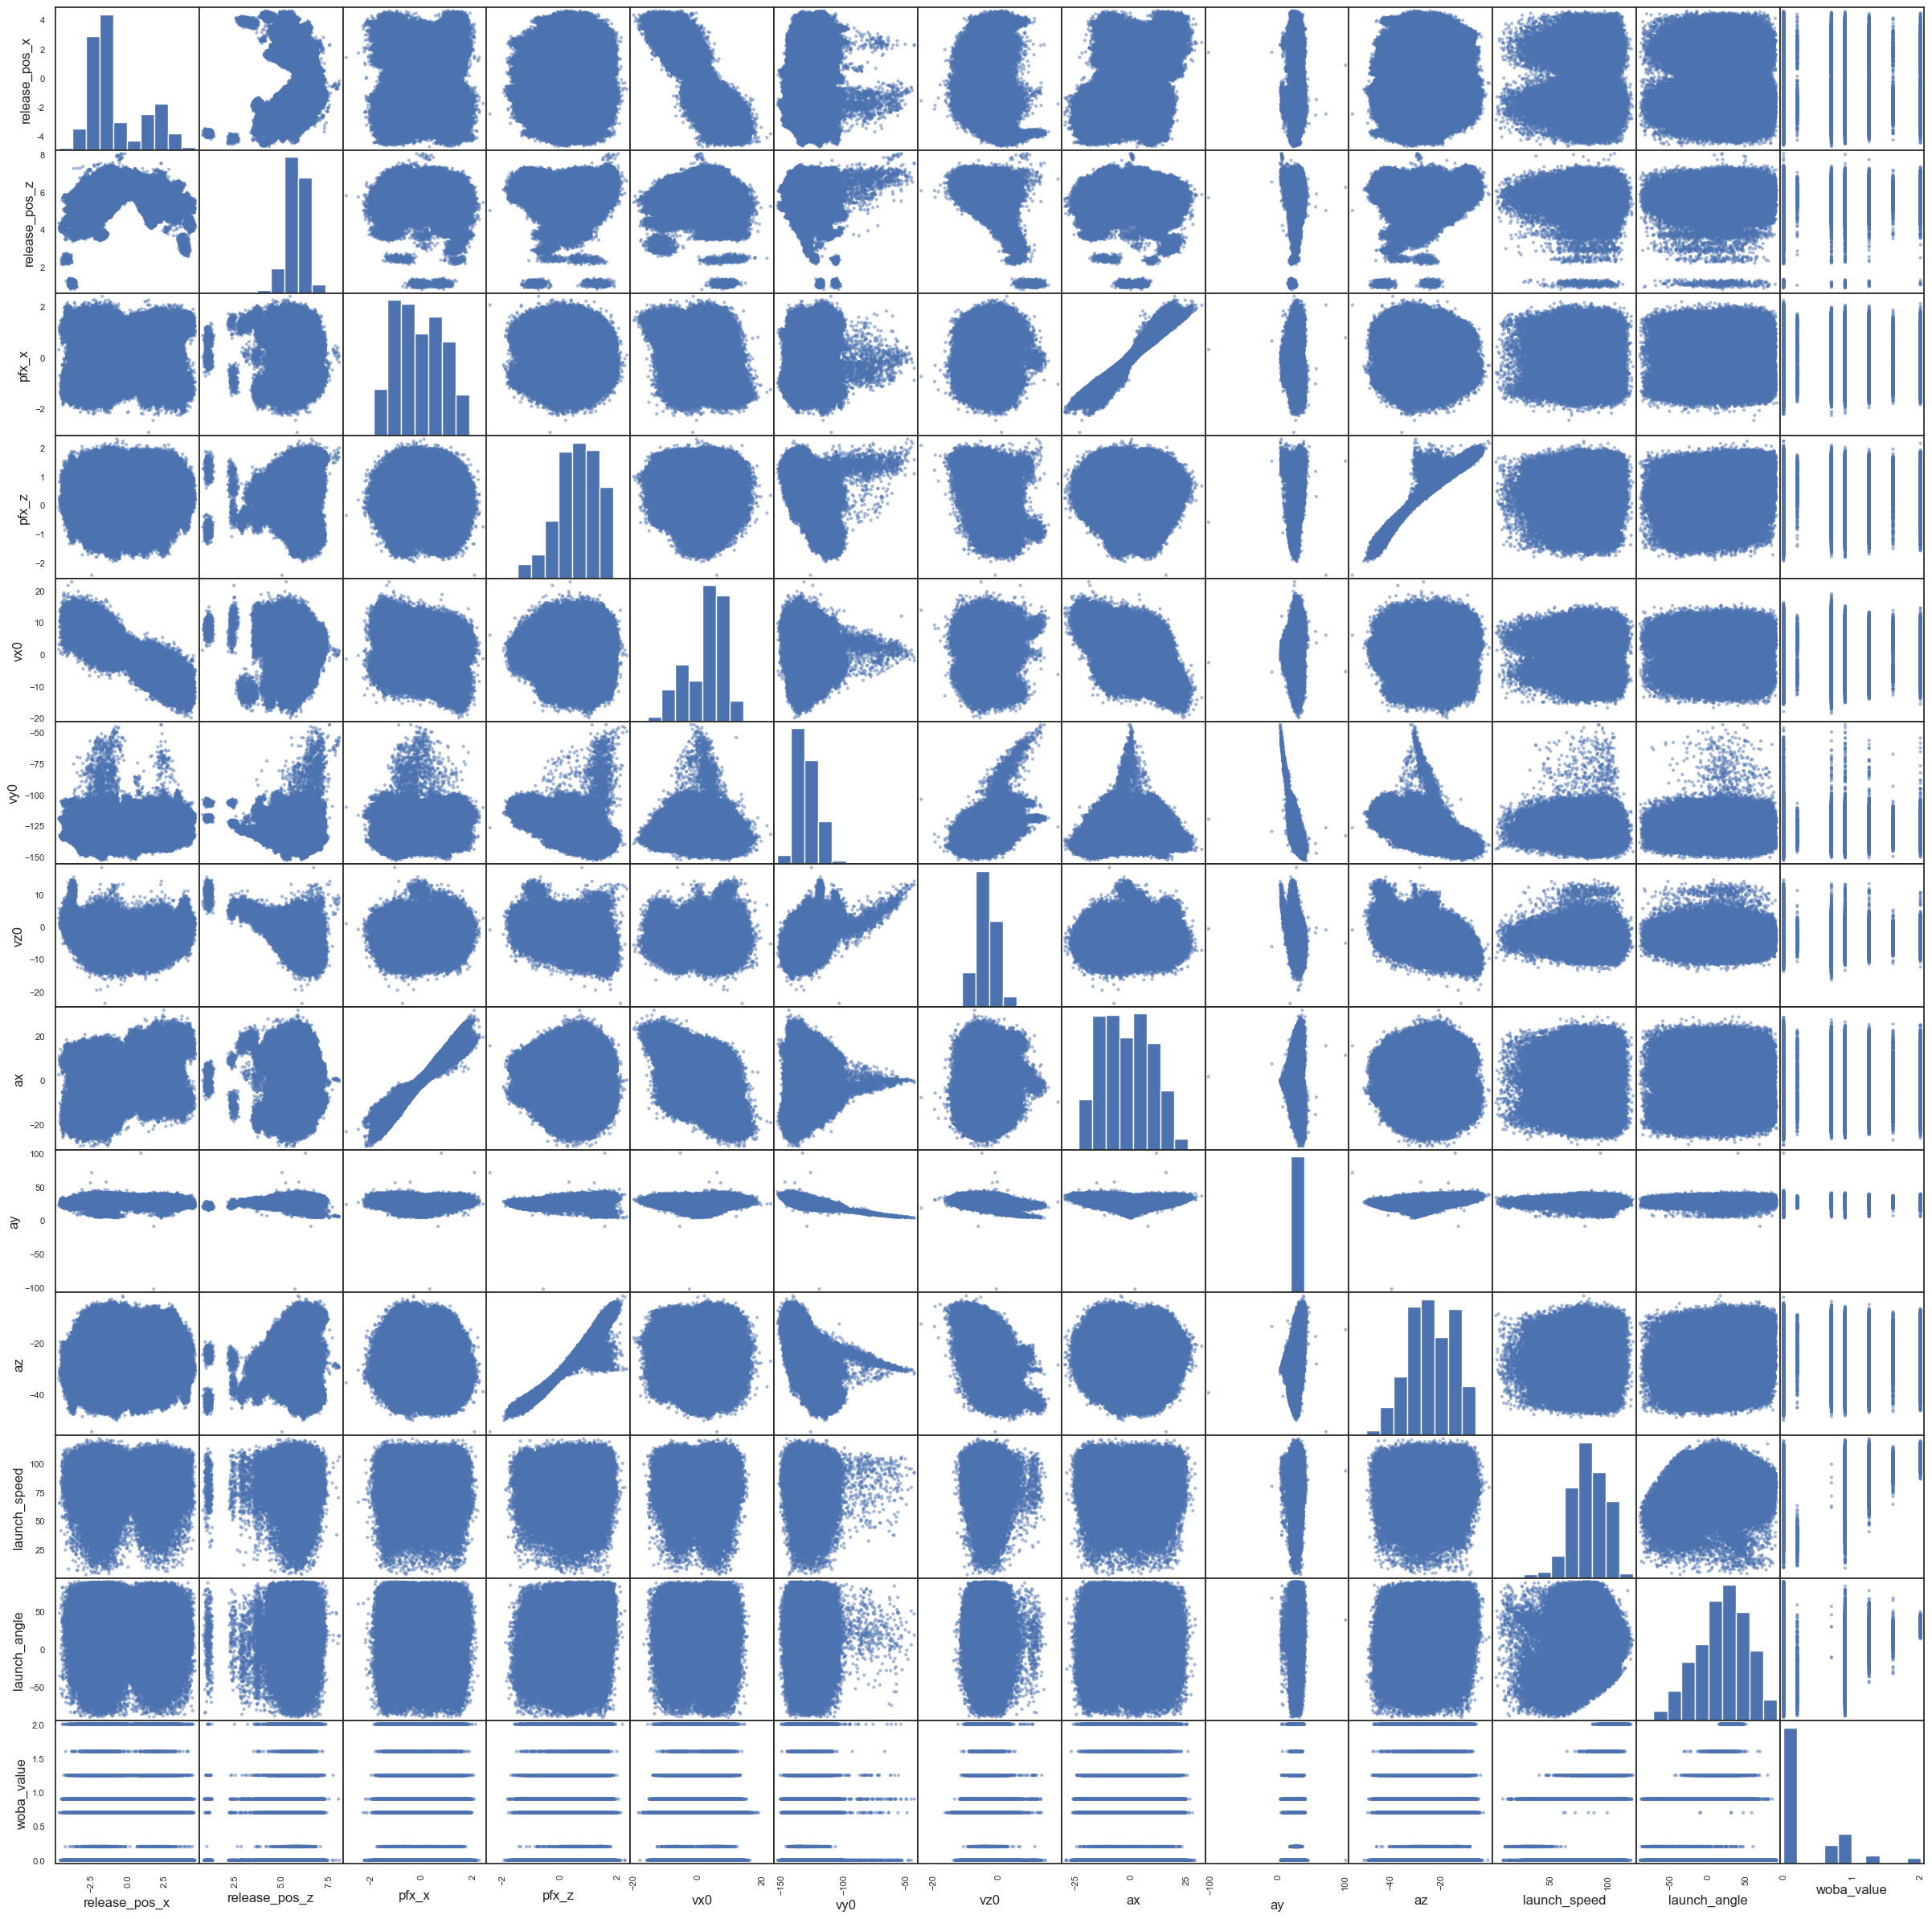

In [6]:
possible_features = possible_features[['release_pos_x', 'release_pos_z', #removed release_speed because it is the same as vy0
                                       'pfx_x','pfx_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 
                                       'launch_speed', 'launch_angle','woba_value']]

pd.plotting.scatter_matrix(possible_features, figsize=(30, 30))
plt.show()

**Legend Set Up**

In [7]:
events_renamed = {
    'home_run':'Home Run',
    'triple':'Triple', 
    'field_out' :'Field Out',
    'single':'Single',
    'double':'Double'
}

data['Events'] = data['events'].map(events_renamed)

pal = {
    
    'Home Run':'red',
    'Triple':'red', 
    'Field Out':'#2288b6',
    'Single':'yellow',
    'Double':'orange'
}

**Events Dataframe Set Up**

In [8]:
hitting_df = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

hitting_df = hitting_df[hitting_df['launch_speed'].notna()]
hitting_df = hitting_df[hitting_df['launch_angle'].notna()]
hitting_df = hitting_df[hitting_df['hc_x'].notna()]
hitting_df = hitting_df[hitting_df['hc_y'].notna()]
hitting_df = hitting_df[hitting_df['hit_distance_sc'].notna()]

### Analyzing Baseball Events with Histograms

In the context of baseball-related data analysis, histograms are invaluable tools for comparing various baseball events (e.g., home runs, singles, doubles) with essential metrics like launch speed, launch angle, and hit distance. These visualizations help us gain insights into how different types of events relate to key performance indicators.

#### Key Significance:

- **Event Distribution:** Histograms allow us to visualize the distribution of baseball events (e.g., home runs, singles, doubles) based on specific metrics. We can see how frequently each type of event occurs across different ranges of metrics.

- **Performance Correlations:** By comparing events to metrics like launch speed, launch angle, and hit distance, we can assess how these metrics impact the likelihood or frequency of specific events. For example, do higher launch speeds correlate with more home runs?

- **Pattern Recognition:** Histograms aid in identifying patterns and trends in baseball data. We can quickly identify whether certain metrics have a significant influence on the occurrence of specific events.

Through these histograms, we can make data-driven observations about the relationships between performance metrics and baseball events. This information is crucial for player evaluation, game strategy, and gaining deeper insights into the sport of baseball.

[Text(0.5, 0, "80th Percentile EV's Distance"), Text(0, 0.5, 'Count')]

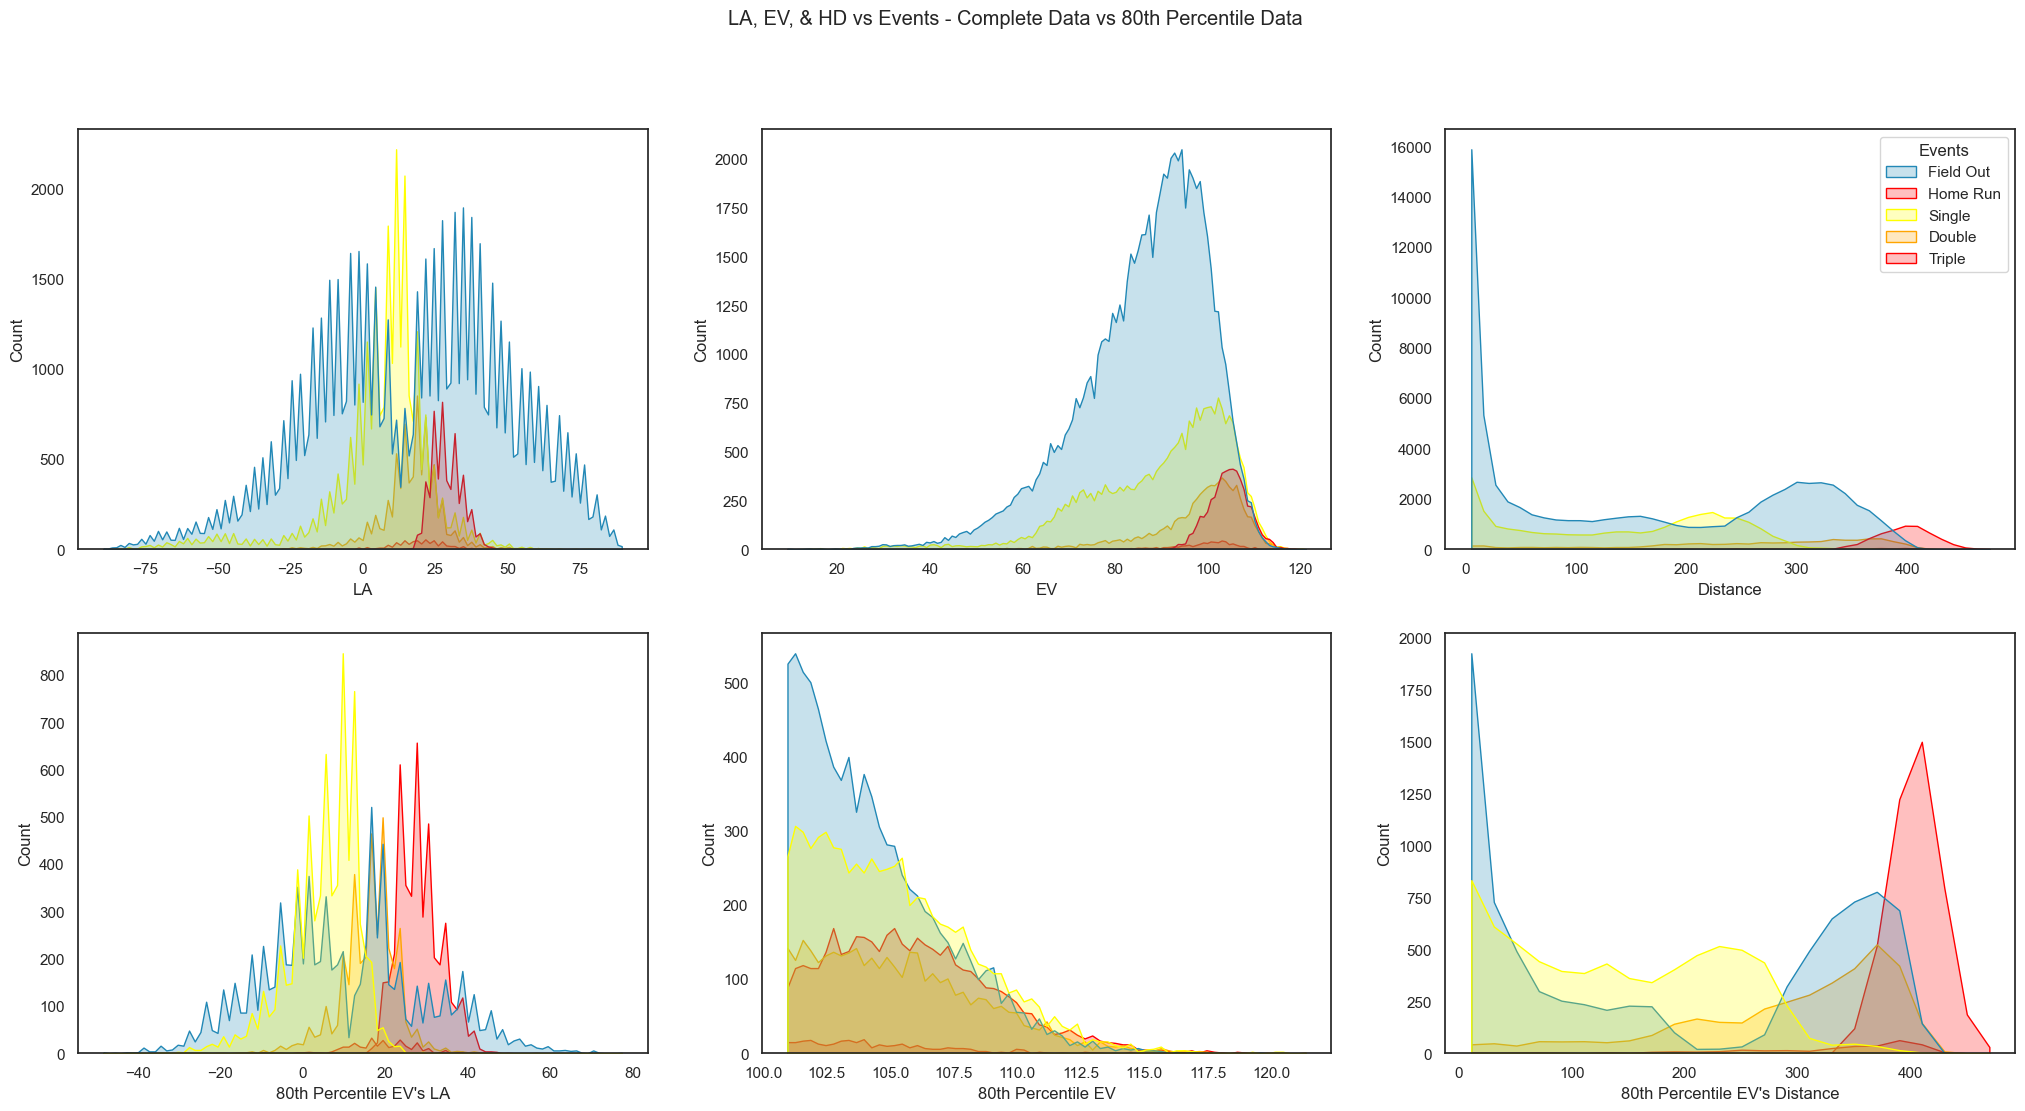

In [9]:
ev_80_percentile_df = hitting_df

ev_80_percentile_df['launch_speed_percentile'] = ev_80_percentile_df['launch_speed'].rank(pct=True)

ev_80_percentile_df = ev_80_percentile_df.loc[ev_80_percentile_df['launch_speed_percentile'] > .79]

ev_80_percentile_df = ev_80_percentile_df.rename(columns={'launch_speed': '80th_EV_launch_speed', 'launch_angle': '80th_EV_launch_angle', 'hit_distance_sc':'80th_EV_hit_distance_sc'})

fig, axes = plt.subplots(2, 3, figsize=(25, 12))

fig.suptitle('LA, EV, & HD vs Events - Complete Data vs 80th Percentile Data')
sns.set_theme(style="white")


ax = sns.histplot(ax=axes[0, 0], data=hitting_df,x="launch_angle", hue="Events", element="poly", legend=False,palette=pal)
ax.set(xlabel = 'LA',ylabel = 'Count')

ax = sns.histplot(ax=axes[0, 1], data=hitting_df,x="launch_speed", hue="Events",  legend=False,element="poly",palette=pal)
ax.set(xlabel = 'EV',ylabel = 'Count')

ax = sns.histplot(ax=axes[0, 2], data=hitting_df,x="hit_distance_sc", hue="Events", element="poly", legend=True,palette=pal)
ax.set(xlabel = 'Distance',ylabel = 'Count')


ax = sns.histplot(ax=axes[1, 0], data=ev_80_percentile_df,x="80th_EV_launch_angle", hue="Events", element="poly", legend=False,palette=pal)
ax.set(xlabel = "80th Percentile EV's LA",ylabel = 'Count')

ax = sns.histplot(ax=axes[1, 1], data=ev_80_percentile_df,x="80th_EV_launch_speed", hue="Events", element="poly", legend=False,palette=pal)
ax.set(xlabel = '80th Percentile EV',ylabel = 'Count')
ax = sns.histplot(ax=axes[1, 2], data=ev_80_percentile_df,x="80th_EV_hit_distance_sc", hue="Events", element="poly", legend=False,palette=pal)
ax.set(xlabel = "80th Percentile EV's Distance",ylabel = 'Count')



### Analyzing Batted Ball Events with a Launch Speed vs. Launch Angle Scatter Plot

A scatter plot that visualizes the relationship between launch speed, launch angle, and different baseball events (e.g., home runs, singles, doubles) is a crucial tool for evaluating hitting performance and understanding the outcomes of batted balls. This type of visualization provides valuable insights into how launch conditions impact the type of events produced.

#### Key Significance:

- **Event Distribution:** The scatter plot shows how launch speed and launch angle relate to various baseball events. By using different hues for events, it becomes evident which combinations of launch conditions are associated with specific outcomes. For instance, it helps identify regions of the plot where home runs are more likely to occur or where singles are prevalent.

- **Performance Assessment:** Hitters and coaches can use this scatter plot to evaluate hitting performance by assessing which launch conditions are conducive to desired outcomes. They can target specific launch conditions to increase the likelihood of achieving particular events (e.g., aiming for higher launch angles for more home runs).

- **Identifying Areas for Improvement:** The scatter plot can reveal areas where hitters may need improvement. For example, if a hitter consistently produces weak outcomes (e.g., pop-outs) in a particular launch condition range, adjustments to their hitting approach can be made.

- **Strategic Insights:** Teams can use this analysis to inform strategic decisions, such as optimizing lineups or defensive positioning based on the likelihood of specific events in different parts of the field.

- **Progress Tracking:** Over time, players and coaches can track changes in hitting performance by comparing scatter plots from different periods. This allows for a visual assessment of improvements or areas that require further development.

In summary, a scatter plot that incorporates launch speed, launch angle, and event types as hues provides a valuable tool for assessing hitting performance and understanding how launch conditions influence batted ball outcomes. It guides hitters in making data-driven adjustments to their approach, assists coaches in player development, and aids teams in strategic decision-making.

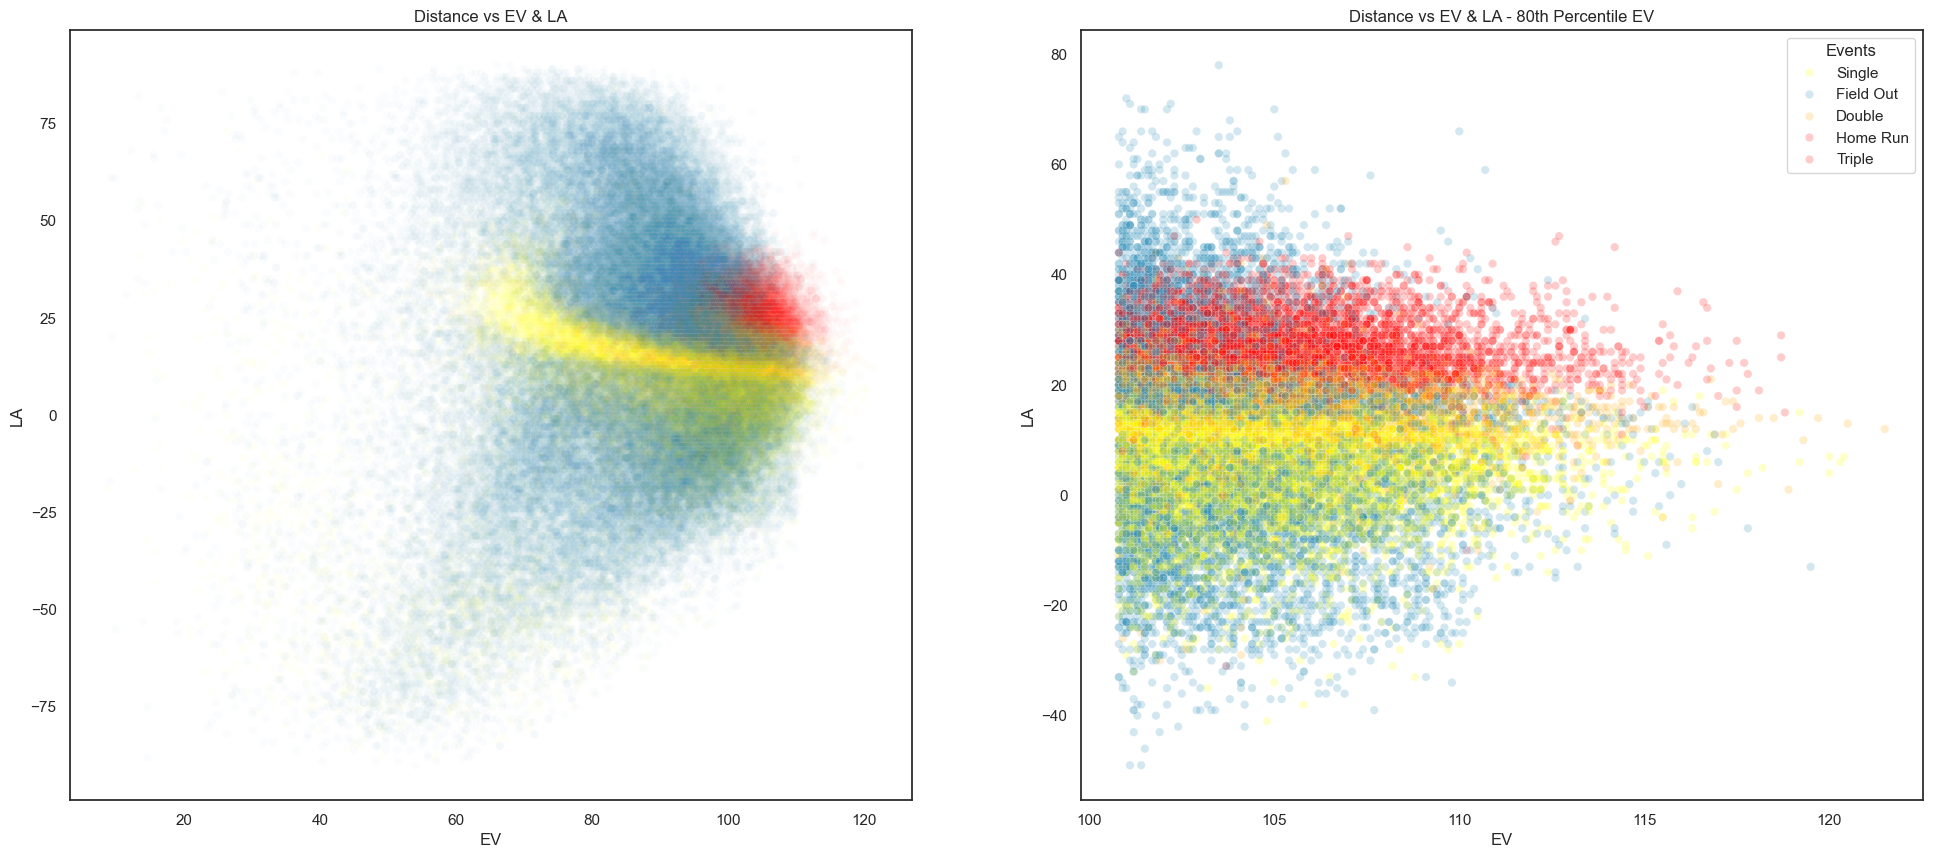

In [10]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(141)
ax = sns.scatterplot(data = hitting_df, x=hitting_df.launch_speed, y=hitting_df.launch_angle, hue = hitting_df.Events, alpha = 0.02,legend=False,palette=pal)
ax.set(xlabel = 'EV',ylabel = 'LA')
plt.title('Distance vs EV & LA')

plt.subplot(142)
#cmap="PiYG")
ax = sns.scatterplot(data = ev_80_percentile_df, x=ev_80_percentile_df['80th_EV_launch_speed'], y=ev_80_percentile_df['80th_EV_launch_angle'], hue = ev_80_percentile_df.Events, alpha = 0.2,palette=pal)
ax.set(xlabel = 'EV',ylabel = 'LA')
plt.title('Distance vs EV & LA - 80th Percentile EV')

plt.show()

### Analyzing Hitting Performance with a Launch Speed vs. Launch Angle Heatmap

A heatmap that visualizes the relationship between launch speed, launch angle, and wOBA (Weighted On-Base Average) provides critical insights into hitting performance in baseball. This type of visualization helps analysts, hitters, and coaches understand the dynamics of how batted ball outcomes are influenced by these key metrics.

#### Key Significance:

- **Determining Batted Ball Outcomes:** The heatmap displays how different combinations of launch speed and launch angle relate to wOBA. By incorporating wOBA as the hue, we gain an immediate understanding of which launch conditions are associated with various batted ball outcomes, such as home runs, singles, doubles, and more.

- **Identifying Optimal Launch Conditions:** Hitters can use this heatmap to pinpoint their optimal launch conditions—specific launch speed and launch angle ranges that lead to the highest wOBA values. This knowledge enables them to adjust their hitting approach for better results.

- **Tracking Progress and Making Adjustments:** Over time, hitters can monitor their hitting performance by comparing heatmaps from different seasons. This allows them to assess whether they are hitting the ball harder, achieving more desirable launch angles, and improving their overall wOBA.

- **Coaching Insights:** Coaches can utilize the heatmap to identify areas where hitters may need improvement. For instance, they can spot if a hitter consistently falls short of optimal launch conditions or if they struggle with specific batted ball outcomes.

- **Strategic Decision-Making:** Teams can use this analysis to make strategic decisions, such as optimizing lineups or providing targeted training to hitters based on their launch characteristics.

In summary, a heatmap that combines launch speed, launch angle, and wOBA offers a powerful tool for understanding and evaluating hitting performance in baseball. It provides actionable insights for players looking to improve their hitting approach, coaches seeking to enhance player performance, and analysts aiming to optimize team strategies.

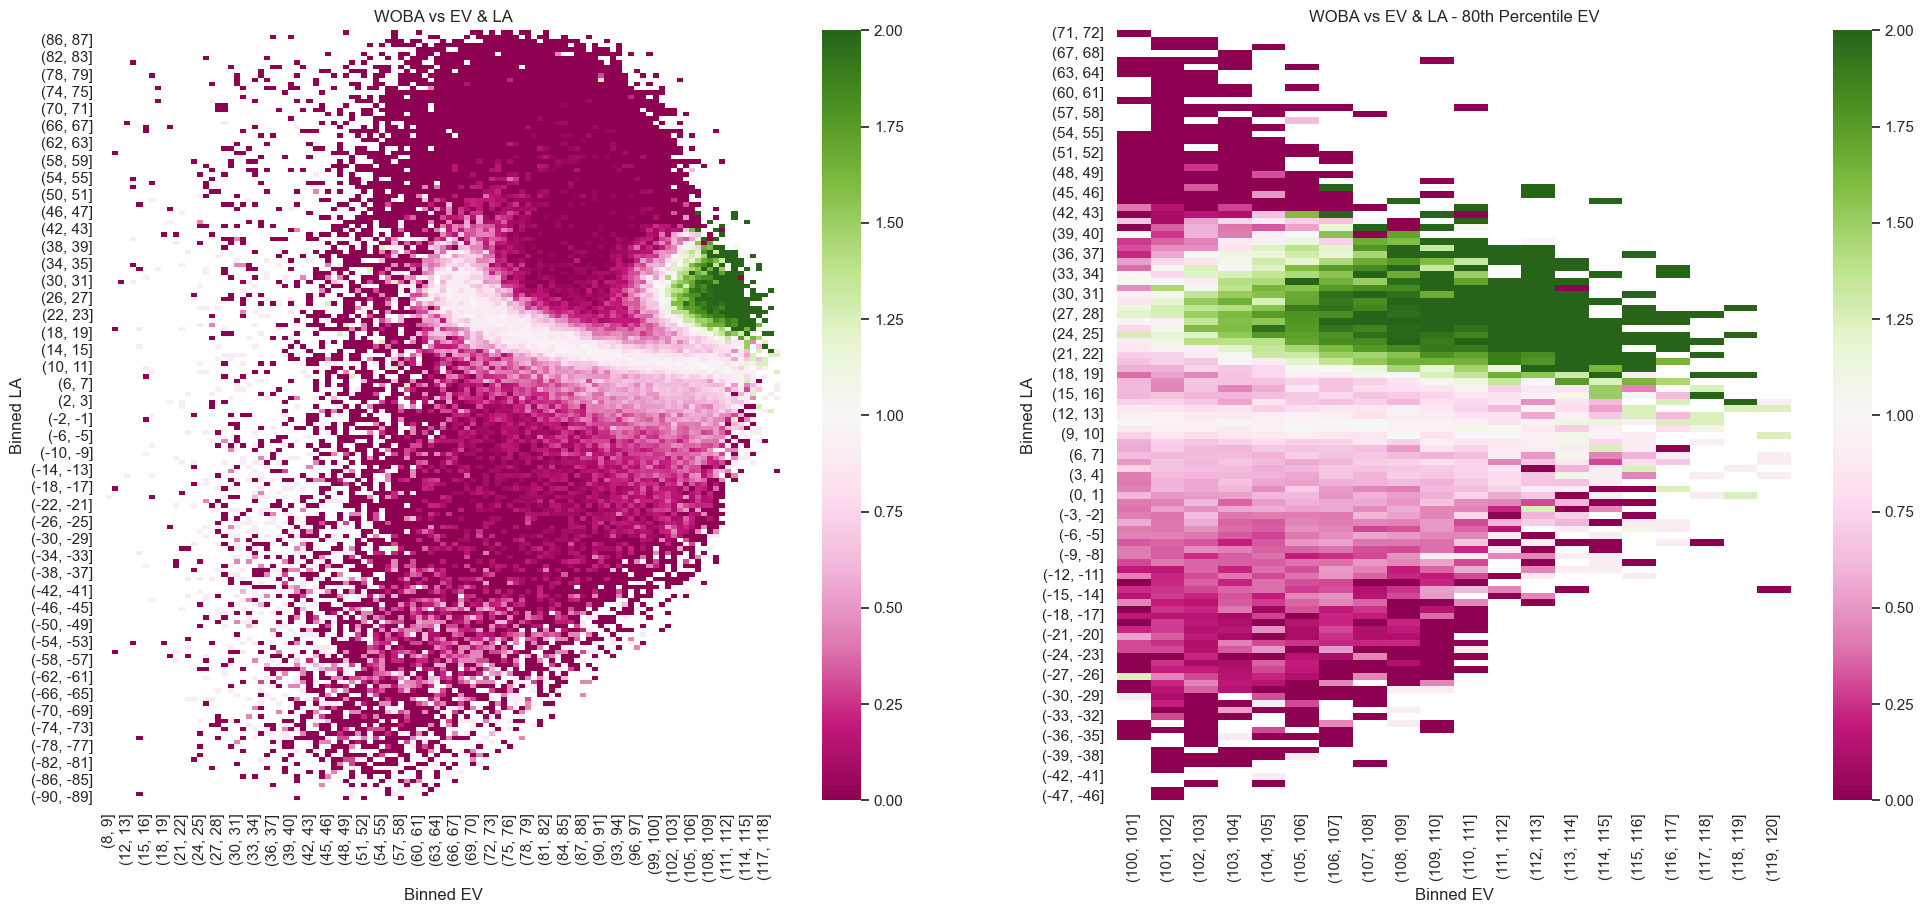

In [11]:
import warnings
#only turning off for graph
warnings.filterwarnings("ignore")


hitting_df_binned = hitting_df

bins = []
for i in range(int(hitting_df["launch_angle"].min()), int(hitting_df["launch_angle"].max()), 1):
    bins.append(i)

hitting_df_binned['launch_angle_binned'] = pd.cut(hitting_df_binned['launch_angle'], bins)

bins = []
for i in range(int(hitting_df["launch_speed"].min()), int(hitting_df["launch_speed"].max()), 1):
    bins.append(i)

hitting_df_binned['launch_speed_binned'] = pd.cut(hitting_df_binned['launch_speed'], bins)

non_coors_new_rel_terms = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='launch_speed_binned', values='woba_value', aggfunc='mean')


#------80TH PERCENTILE DATA BINNING-------------


hitting_df_binned_80 = ev_80_percentile_df

bins = []
for i in range(int(hitting_df_binned_80["80th_EV_launch_angle"].min()), int(hitting_df_binned_80["80th_EV_launch_angle"].max()), 1):
    bins.append(i)

hitting_df_binned_80['80th_EV_launch_angle_binned'] = pd.cut(hitting_df_binned_80['80th_EV_launch_angle'], bins)

bins = []
for i in range(int(hitting_df_binned_80["80th_EV_launch_speed"].min()), int(hitting_df_binned_80["80th_EV_launch_speed"].max()), 1):
    bins.append(i)

hitting_df_binned_80['80th_EV_launch_speed_binned'] = pd.cut(hitting_df_binned_80['80th_EV_launch_speed'], bins)

non_coors_new_rel_terms_80 = hitting_df_binned_80.pivot_table(index='80th_EV_launch_angle_binned', columns='80th_EV_launch_speed_binned', values='woba_value', aggfunc='mean')


#---------PLOTTING FIGS--------------


plt.figure(figsize=(50,10))
sns.set_theme(style="white")  

plt.subplot(141)
ax = sns.heatmap(non_coors_new_rel_terms,cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel = 'Binned EV',ylabel = 'Binned LA')
plt.title('WOBA vs EV & LA')

plt.subplot(142)
ax = sns.heatmap(non_coors_new_rel_terms_80, cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel = 'Binned EV',ylabel = 'Binned LA')
plt.title('WOBA vs EV & LA - 80th Percentile EV')

plt.show()

### Spatial Analysis of Batted Ball Outcomes with X vs. Y Location Scatter Plot

A scatter plot that visualizes the X vs. Y location coordinates of where a batted ball ended up on the field, using different hues to represent the type of event (e.g., home run, single, double), is an essential tool for gaining insights into hitting performance and understanding the spatial distribution of batted ball outcomes.

#### Key Significance:

- **Spatial Event Mapping:** The scatter plot creates a spatial map of batted ball events across the field, illustrating where different types of events (e.g., home runs, singles, doubles) are situated. This mapping offers valuable information about the spatial tendencies of hitters and helps identify hotspots for specific outcomes.

- **Performance Assessment:** Hitters, coaches, and analysts can use this scatter plot to evaluate hitting performance based on the specific X and Y locations of batted ball outcomes. It facilitates a precise assessment of where a hitter excels in producing desired events and where improvements or adjustments may be needed.

- **Defensive Strategies:** Teams can utilize this analysis to inform defensive strategies, such as positioning fielders in areas where particular events are more likely to occur. It supports optimized defensive alignments and tactical decisions during games.

- **Spatial Patterns:** The scatter plot unveils spatial patterns and trends in batted ball outcomes. It allows us to identify areas of the field where a hitter consistently achieves specific types of events and areas with less frequent events or unique event clusters.

- **Progress Tracking:** Over time, players and coaches can monitor changes in hitting performance by comparing scatter plots from different timeframes. This enables them to gauge improvements, recognize spatial patterns in performance evolution, and fine-tune hitting strategies.

In summary, a scatter plot that displays the X vs. Y location coordinates of batted ball outcomes while incorporating hues to represent event types provides valuable insights into hitting performance and spatial patterns of batted ball outcomes. It facilitates data-driven decision-making for hitters, coaches, and teams, enhancing their understanding of how spatial dynamics influence the outcomes of baseball events.

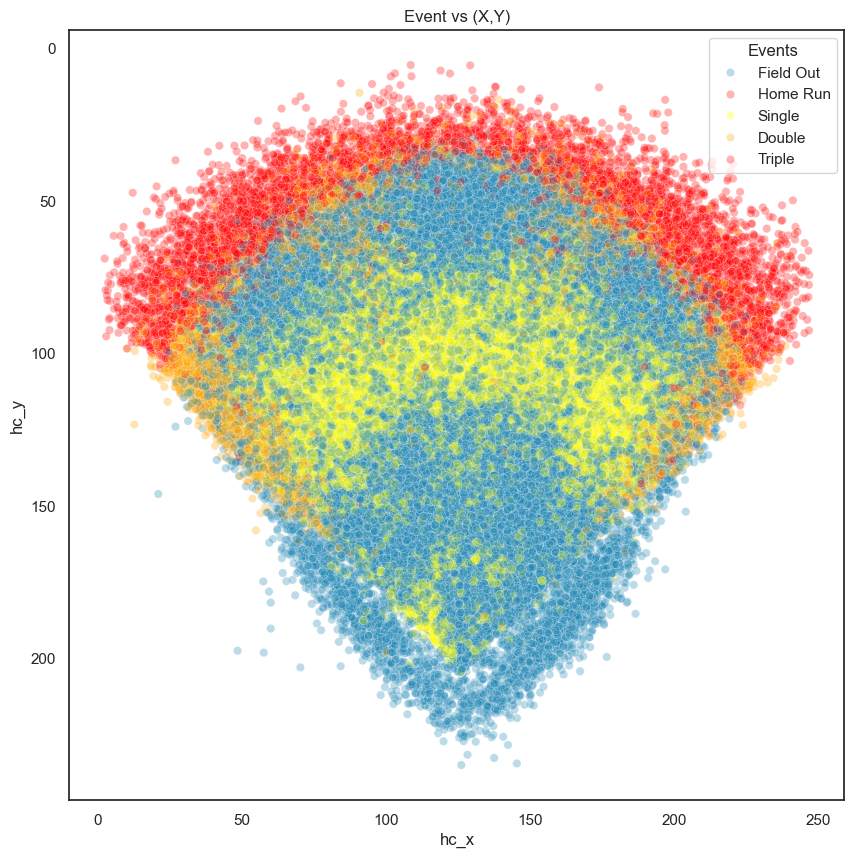

In [12]:
plt.figure(figsize=(10,10))
sns.set_theme(style="white")

ax = sns.scatterplot(data = hitting_df, x=hitting_df.hc_x, y=hitting_df.hc_y,  hue = hitting_df.Events, alpha = 0.3, 
palette=pal)
ax.invert_yaxis()

plt.legend(title = "Events",loc = 'upper right')
plt.title('Event vs (X,Y)')
plt.show()